# Problems 2 - Multiple Linear Regression / Normalization

Let's revisit the problem of house prices. The task to be done is to predict the price of a house given some 'features' of the house. Our input data comprises two features per sample (size of the house, and number of rooms), while the output data is the price of each sample.

Here is the data:

| Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |Size (square feet) | Rooms | Price (USD) |
|:------ |:----|:----------|:------ |:----|:----------|:------ |:----|:----------|:------ |:----|:----------|
| 2104.0 | 3.0 |  **399900.0** | 1890.0 | 3.0 |  **329999.0** | 3890.0 | 3.0 |  **573900.0** | 1239.0 | 3.0 |  **229900.0** |
| 1600.0 | 3.0 |  **329900.0** | 4478.0 | 5.0 |  **699900.0** | 1100.0 | 3.0 |  **249900.0** | 2132.0 | 4.0 |  **345000.0** |
| 2400.0 | 3.0 |  **369000.0** | 1268.0 | 3.0 |  **259900.0** | 1458.0 | 3.0 |  **464500.0** | 4215.0 | 4.0 |  **549000.0** | 
| 1416.0 | 2.0 |  **232000.0** | 2300.0 | 4.0 |  **449900.0** | 2526.0 | 3.0 |  **469000.0** | 2162.0 | 4.0 |  **287000.0** |
| 3000.0 | 4.0 |  **539900.0** | 1320.0 | 2.0 |  **299900.0** | 2200.0 | 3.0 |  **475000.0** | 1664.0 | 2.0 |  **368500.0** | 
| 1985.0 | 4.0 |  **299900.0** | 1236.0 | 3.0 |  **199900.0** | 2637.0 | 3.0 |  **299900.0** | 2238.0 | 3.0 |  **329900.0** | 
| 1534.0 | 3.0 |  **314900.0** | 2609.0 | 4.0 |  **499998.0** | 1839.0 | 2.0 |  **349900.0** | 2567.0 | 4.0 |  **314000.0** | 
| 1427.0 | 3.0 |  **198999.0** | 3031.0 | 4.0 |  **599000.0** | 1000.0 | 1.0 |  **169900.0** | 1200.0 | 3.0 |  **299000.0** | 
| 1380.0 | 3.0 |  **212000.0** | 1767.0 | 3.0 |  **252900.0** | 2040.0 | 4.0 |  **314900.0** | 852.0  | 2.0 |  **179900.0** | 
| 1494.0 | 3.0 |  **242500.0** | 1888.0 | 2.0 |  **255000.0** | 3137.0 | 3.0 |  **579900.0** | 1852.0 | 4.0 |  **299900.0** | 
| 1940.0 | 4.0 |  **239999.0** | 1604.0 | 3.0 |  **242900.0** | 1811.0 | 4.0 |  **285900.0** | 1203.0 | 3.0 |  **239500.0** | 
| 2000.0 | 3.0 |  **347000.0** | 1962.0 | 4.0 |  **259900.0** | 1437.0 | 3.0 |  **249900.0** | 
 
Let's first get them into Python. For simplification we are going to use only one feature for the time being - the size of the house.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
size = np.array([2104., 1600., 2400., 1416., 3000., 1985., 1534., 1427., 1380., 
       1494., 1940., 2000., 1890., 4478., 1268., 2300., 1320., 1236.,
       2609., 3031., 1767., 1888., 1604., 1962., 3890., 1100., 1458.,
       2526., 2200., 2637., 1839., 1000., 2040., 3137., 1811., 1437.,
       1239., 2132., 4215., 2162., 1664., 2238., 2567., 1200.,  852.,
       1852., 1203.])

rooms = np.array([3., 3., 3., 2., 4., 4., 3., 3., 3., 3., 4., 3., 3., 5., 3., 4., 2.,
       3., 4., 4., 3., 2., 3., 4., 3., 3., 3., 3., 3., 3., 2., 1., 4., 3.,
       4., 3., 3., 4., 4., 4., 2., 3., 4., 3., 2., 4., 3.])

price = np.array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

The gradient descent function we used last time is the following. We have done a small modification to store and return the cost in every iteration, so that we can then plot the evolution of the cost during the optimisation (training) process.

0.08050805332714407
163.9249033496211


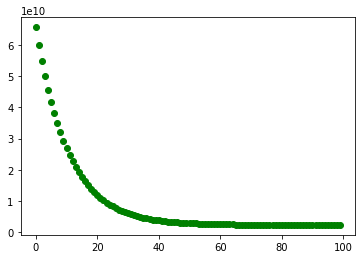

In [10]:
def GradientDescent(x, y, max_iterations=100, alpha=1):
    m = len(x) # number of samples
    J = np.zeros(max_iterations)
   
    #initialize the parameters to zero (or any other random value)
    theta0 = 0
    theta1 = 0
    
    for it in range(max_iterations): #lets take a max of max_iteration steps updating the parameters
        s0 = 0 # We will use this to calculate the sum inside the cost function
        s1 = 0
        for i in range(m): #Go over the points and calculate the sum
            h = theta0 + theta1 * x[i]
            s0 = s0 + (h - y[i])
            s1 = s1 + (h - y[i])* x[i]
            J[it] = J[it]+(h - y[i])**2
        Grad0 = s0 / m 
        Grad1 = s1 / m 
        J[it] /= 2*m
        
        theta0 = theta0 - alpha * Grad0
        theta1 = theta1 - alpha * Grad1
        
    return [theta0, theta1, J]
    
[theta0, theta1, J] = GradientDescent(size, price, alpha=0.00000001)

print(theta0)
print(theta1)
plt.plot(np.arange(len(J)), J, 'go')

<font color=blue>Use the above function with different initial values for the thetas. What do you observe?</font>

---

*Your answer here*

---


<font color=blue>Now normalise your data and do the gradient descent again. What do you observe in terms of the alpha required? What do you observe in terms of the final values obtained.</font>

338397.23647648585
105137.95385000804


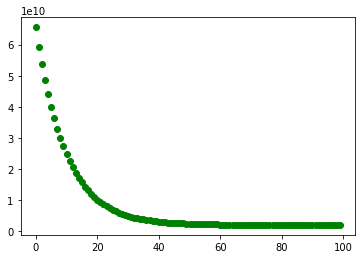

In [11]:
# Your Code Here #

size_norm = (size - np.mean(size))/(np.std(size))

[theta0, theta1, J] = GradientDescent(size_norm, price, alpha=0.05)

print(theta0)
print(theta1)
plt.plot(np.arange(len(J)), J, 'go')

---

*Your answer here*

---


<br>

<font color=blue>Use the model you have calculated to predict the price of a house with `size = 3200` square feet.</font>

In [12]:
# Your Code Here #


Now let's rewrite our Gradient Descent function in a slightly more efficient form, using numpy, so that it can take as input a variable number of features. X in this case will be the design matrix of size (#samples $\times$ #features + 1) and Y will be a vector of the true outputs of size (#samples $\times$ 1)

In [13]:
def GradientDescent_np(X, y, max_iterations=100, alpha=1):
    m = X.shape[0] # number of samples
    J = np.zeros(max_iterations)

    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)
    
    #initialize the parameters to zero
    theta = np.zeros(shape=(X.shape[1], 1))
    
    # Repeat for max_iterations (it would be nice to also check convergence...)
    for iteration in range(max_iterations):
        grad = np.dot(X.T , (np.dot(X,theta) - y)) / m;
        theta = theta - alpha*grad
        J[iteration] = sum( (np.dot(X,theta) - y)**2)
    return [theta, J]

<br>

Let's use the new version of Gradient Descent to calculate the parameter values 

[[1.000e+00 2.104e+03]
 [1.000e+00 1.600e+03]
 [1.000e+00 2.400e+03]
 [1.000e+00 1.416e+03]]
[[ 1.          0.13000987]
 [ 1.         -0.50418984]
 [ 1.          0.50247636]
 [ 1.         -0.73572306]]
theta result:[[340403.61773803]
 [106903.9668554 ]]


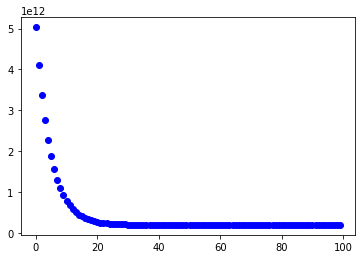

In [18]:
#prepare the design matrix, starting with a column of ones (this is the x_0 for the bias term), 
#and concatenating the size feature
X = np.hstack( (np.ones(shape=(size.shape[0], 1)), size.reshape(size.shape[0], 1)))

#Let's print out a few samples to verify we have done this right
print(X[0:4, :])

# Scale features and set them to zero mean (standarize)
mu = np.mean(X, 0) #calculate the mean for every column
sigma = np.std(X, 0, ddof=1) #calculate the standard deviation for every column

#normalize everything except X0 (the artificial first feature that we set to ones)
X[:,1] = (X[:,1] - mu[1]) / sigma[1];

#Let's print out a few samples to verify we have done this right
print(X[0:4, :])

[theta, J] = GradientDescent_np(X, price, alpha=0.1)
print('theta result:{0}'.format(theta))

plt.plot(np.arange(len(J)), J, 'bo')

<font color=blue>Do the same, but this time using the rooms feature as well</font>

In [16]:
# Your Code Here #
